In [1]:
import pandas as pd
import numpy as np
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet import Prophet
import matplotlib.pylab as plt
import scipy.signal

In [3]:
ts = pd.read_excel("C:/Users/caste/Desktop/fisher_river.xlsx")
ts.head()

,Date,"Mean daily temperature, Fisher River near Dallas, Jan 01, 1988 to Dec 31, 1991"
0,1988-01-01,-23.0
1,1988-01-02,-20.5
2,1988-01-03,-22.0
3,1988-01-04,-30.5
4,1988-01-05,-31.0


In [23]:
ts = ts.rename(index= str, columns={'Date':'ds', 'Mean daily temperature, Fisher River near Dallas, Jan 01, 1988 to Dec 31, 1991': 'y'})
ts['y'] = [i+100 for i in ts['y']]
ts.head()

,ds,y
0,1988-01-01,77.0
1,1988-01-02,79.5
2,1988-01-03,78.0
3,1988-01-04,69.5
4,1988-01-05,69.0


In [24]:
m = Prophet()
m.fit(ts)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\caste\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [25]:
future = m.make_future_dataframe(periods = 365)
future.tail()

,ds
1821,1992-12-26
1822,1992-12-27
1823,1992-12-28
1824,1992-12-29
1825,1992-12-30


In [26]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1821,1992-12-26,78.914114,71.075508,86.138676
1822,1992-12-27,78.867448,71.095739,86.107019
1823,1992-12-28,78.672841,70.934692,86.157837
1824,1992-12-29,78.677572,70.895504,85.600600
1825,1992-12-30,78.344449,70.752511,85.709034


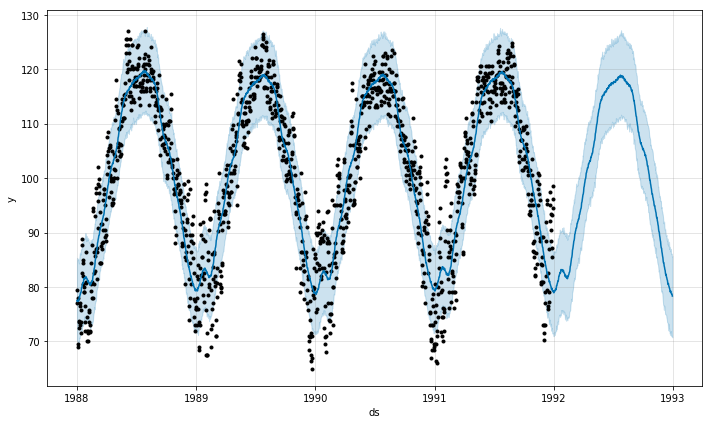

In [27]:
fig1 = m.plot(forecast)
plt.show()

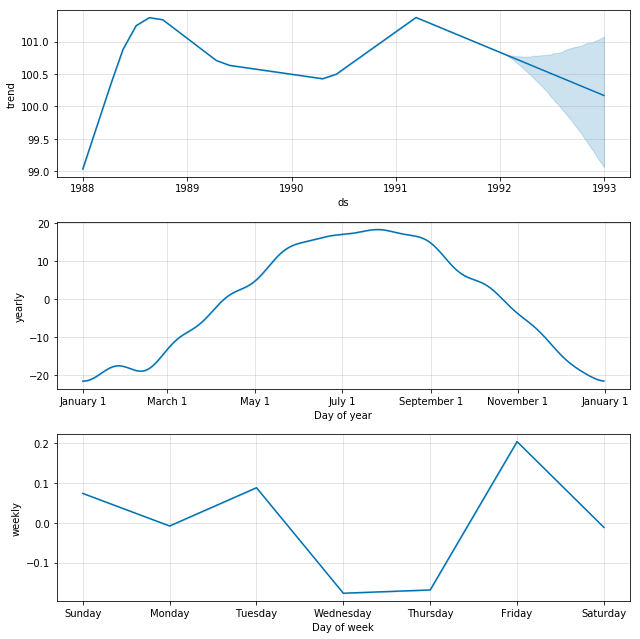

In [28]:
fig2 = m.plot_components(forecast)
plt.show()

In [29]:
ts_cv = cross_validation(m, initial='730 days', period = '90 days', horizon = '180 days')
ts_cv.head()

INFO:fbprophet.diagnostics:Making 7 forecasts with cutoffs between 1990-01-10 00:00:00 and 1991-07-04 00:00:00
C:\Users\caste\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1990-01-11,80.582015,73.229983,87.370718,91.50,1990-01-10
1,1990-01-12,81.840200,74.797054,88.817188,83.25,1990-01-10
2,1990-01-13,81.989240,74.651775,88.614072,84.00,1990-01-10
3,1990-01-14,82.063064,74.857032,89.057770,88.00,1990-01-10
4,1990-01-15,81.409159,74.315858,88.551720,88.50,1990-01-10


In [30]:
ts_p = performance_metrics(ts_cv)
ts_p.head()

,horizon,mse,rmse,mae,mape,coverage
197,18 days,29.407502,5.422868,4.205236,0.045049,0.801587
378,19 days,28.476762,5.336362,4.129609,0.044195,0.809524
198,19 days,28.166853,5.307245,4.116507,0.043602,0.809524
918,19 days,28.014854,5.292906,4.090659,0.043379,0.809524
558,19 days,27.911130,5.283098,4.085860,0.043336,0.809524


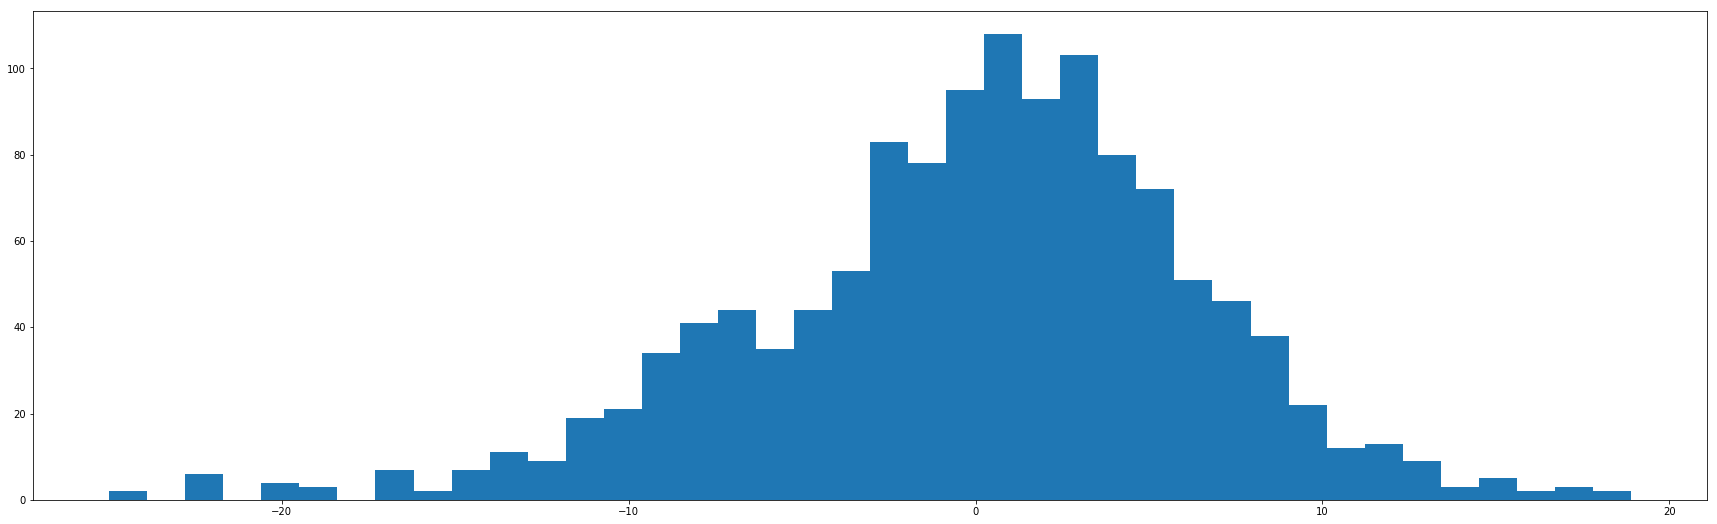

In [31]:
residuals = ts_cv['yhat']-ts_cv['y']
plt.figure(figsize=(30,9))
plt.hist(residuals, bins = 40)
plt.show()

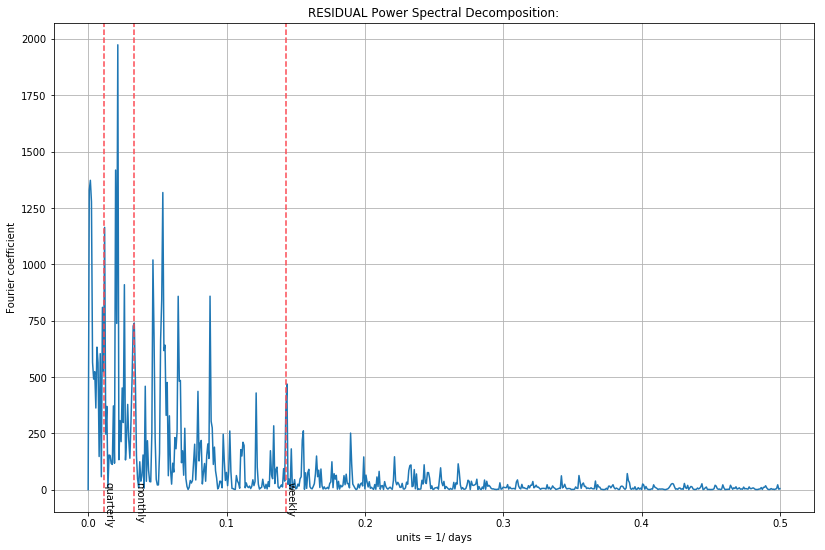

In [32]:
Title = "RESIDUAL Power Spectral Decomposition:"
xf,yff = scipy.signal.periodogram(residuals)

f = plt.figure(facecolor ='w', figsize=(30,9))
ax = f.add_subplot(121)
ax.set(xlabel='units = 1/ ' + 'days', ylabel='Fourier coefficient',
           title= Title)
ax.grid()
ax.plot(xf, yff)
plt.axvline(x=1/7, c  = "#fc4b54", ls ='dashed')
plt.text(1/7, 0 ,'weekly',rotation=-90)
plt.axvline(x =1/30, c = "#fc4b54",  ls ='dashed')
plt.text(1/30,0, 'monthly',rotation=-90)
plt.axvline(x =1/90.125, c = '#fc4b54',  ls ='dashed')
plt.text(1/90.125,0, 'quarterly', rotation = -90)
plt.show()

In [63]:
m = Prophet(yearly_seasonality = 11)
m.fit(ts)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\caste\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [64]:
ts_cv = cross_validation(m, initial='730 days', period = '90 days', horizon = '180 days')
ts_cv.head()

INFO:fbprophet.diagnostics:Making 7 forecasts with cutoffs between 1990-01-10 00:00:00 and 1991-07-04 00:00:00
C:\Users\caste\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1990-01-11,80.155294,73.623118,86.451060,91.50,1990-01-10
1,1990-01-12,81.455944,74.106492,88.750676,83.25,1990-01-10
2,1990-01-13,81.663530,74.023767,88.276968,84.00,1990-01-10
3,1990-01-14,81.808418,74.510975,88.835752,88.00,1990-01-10
4,1990-01-15,81.235477,74.060562,88.085699,88.50,1990-01-10


In [65]:
ts_p = performance_metrics(ts_cv)
ts_p.head()

,horizon,mse,rmse,mae,mape,coverage
197,18 days,29.599913,5.440580,4.205749,0.045086,0.793651
378,19 days,28.592719,5.347216,4.126347,0.044192,0.801587
198,19 days,28.267393,5.316709,4.112662,0.043589,0.801587
918,19 days,28.111228,5.302002,4.084653,0.043345,0.801587
558,19 days,27.934526,5.285312,4.076601,0.043273,0.801587


In [85]:
for i in range(1,11):
    m = Prophet(yearly_seasonality = 11)
    m.add_seasonality(name='monthly', period=30.5, fourier_order=i)
    m.fit(ts)
    ts_cv = cross_validation(m, initial='730 days', period = '90 days', horizon = '180 days')
    ts_p = performance_metrics(ts_cv)
    print(ts_p.head())

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\caste\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet.diagnostics:Making 7 forecasts with cutoffs between 1990-01-10 00:00:00 and 1991-07-04 00:00:00
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    horizon        mse      rmse       mae      mape  coverage
197 18 days  30.032523  5.480194  4.238408  0.045463  0.777778
378 19 days  28.978196  5.383140  4.156934  0.044546  0.785714
198 19 days  28.594948  5.347424  4.140835  0.043912  0.785714
918 19 days  28.441835  5.333089  4.114717  0.043686  0.785714
558 19 days  28.276876  5.317601  4.107084  0.043617  0.785714


INFO:fbprophet.diagnostics:Making 7 forecasts with cutoffs between 1990-01-10 00:00:00 and 1991-07-04 00:00:00
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    horizon        mse      rmse       mae      mape  coverage
197 18 days  30.988172  5.566702  4.276283  0.046030  0.785714
378 19 days  29.934061  5.471203  4.195784  0.045122  0.793651
198 19 days  29.427372  5.424700  4.174786  0.044419  0.793651
918 19 days  29.205099  5.404174  4.137013  0.044087  0.793651
558 19 days  29.017630  5.386801  4.127938  0.044005  0.793651


INFO:fbprophet.diagnostics:Making 7 forecasts with cutoffs between 1990-01-10 00:00:00 and 1991-07-04 00:00:00
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    horizon        mse      rmse       mae      mape  coverage
197 18 days  31.207134  5.586335  4.298927  0.046249  0.793651
378 19 days  30.181561  5.493775  4.217891  0.045339  0.801587
198 19 days  29.742670  5.453684  4.199565  0.044674  0.801587
918 19 days  29.499425  5.431337  4.159597  0.044322  0.801587
558 19 days  29.297606  5.412726  4.150038  0.044236  0.801587


INFO:fbprophet.diagnostics:Making 7 forecasts with cutoffs between 1990-01-10 00:00:00 and 1991-07-04 00:00:00
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    horizon        mse      rmse       mae      mape  coverage
197 18 days  30.968365  5.564923  4.289210  0.046175  0.793651
378 19 days  29.784617  5.457528  4.196401  0.045150  0.801587
198 19 days  29.304064  5.413323  4.176109  0.044464  0.801587
918 19 days  29.017669  5.386805  4.128817  0.044046  0.801587
558 19 days  28.757855  5.362635  4.116920  0.043939  0.801587


INFO:fbprophet.diagnostics:Making 7 forecasts with cutoffs between 1990-01-10 00:00:00 and 1991-07-04 00:00:00
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    horizon        mse      rmse       mae      mape  coverage
197 18 days  31.090886  5.575920  4.285436  0.046144  0.785714
378 19 days  29.884722  5.466692  4.191533  0.045108  0.793651
198 19 days  29.347073  5.417294  4.168778  0.044392  0.793651
918 19 days  29.070110  5.391670  4.124546  0.044002  0.793651
558 19 days  28.716734  5.358800  4.108415  0.043857  0.793651


INFO:fbprophet.diagnostics:Making 7 forecasts with cutoffs between 1990-01-10 00:00:00 and 1991-07-04 00:00:00
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    horizon        mse      rmse       mae      mape  coverage
197 18 days  31.283250  5.593143  4.291154  0.046228  0.793651
378 19 days  30.047181  5.481531  4.195886  0.045177  0.801587
198 19 days  29.468277  5.428469  4.171398  0.044439  0.801587
918 19 days  29.189978  5.402775  4.127240  0.044050  0.801587
558 19 days  28.808969  5.367399  4.109808  0.043892  0.801587


INFO:fbprophet.diagnostics:Making 7 forecasts with cutoffs between 1990-01-10 00:00:00 and 1991-07-04 00:00:00
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    horizon        mse      rmse       mae      mape  coverage
197 18 days  31.219768  5.587465  4.297439  0.046281  0.809524
378 19 days  29.992598  5.476550  4.202671  0.045235  0.817460
198 19 days  29.474753  5.429066  4.180666  0.044531  0.817460
918 19 days  29.191526  5.402918  4.135889  0.044136  0.817460
558 19 days  28.840317  5.370318  4.119706  0.043990  0.817460


INFO:fbprophet.diagnostics:Making 7 forecasts with cutoffs between 1990-01-10 00:00:00 and 1991-07-04 00:00:00
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    horizon        mse      rmse       mae      mape  coverage
197 18 days  31.449511  5.607986  4.306571  0.046419  0.793651
378 19 days  30.256583  5.500598  4.214942  0.045403  0.801587
198 19 days  29.706284  5.450347  4.191245  0.044682  0.801587
918 19 days  29.431841  5.425112  4.145599  0.044279  0.801587
558 19 days  29.115359  5.395865  4.131071  0.044148  0.801587


INFO:fbprophet.diagnostics:Making 7 forecasts with cutoffs between 1990-01-10 00:00:00 and 1991-07-04 00:00:00
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    horizon        mse      rmse       mae      mape  coverage
197 18 days  31.142828  5.580576  4.294778  0.046227  0.793651
378 19 days  29.948294  5.472503  4.203121  0.045211  0.801587
198 19 days  29.442057  5.426054  4.181071  0.044516  0.801587
918 19 days  29.170497  5.400972  4.135966  0.044118  0.801587
558 19 days  28.860210  5.372170  4.121740  0.043989  0.801587


INFO:fbprophet.diagnostics:Making 7 forecasts with cutoffs between 1990-01-10 00:00:00 and 1991-07-04 00:00:00


    horizon        mse      rmse       mae      mape  coverage
197 18 days  31.447360  5.607795  4.319703  0.046510  0.793651
378 19 days  30.216114  5.496919  4.226833  0.045480  0.801587
198 19 days  29.712353  5.450904  4.204869  0.044786  0.801587
918 19 days  29.446499  5.426463  4.159883  0.044389  0.801587
558 19 days  29.160346  5.400032  4.146695  0.044270  0.801587


In [89]:
m = Prophet(yearly_seasonality = 0)
#m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.fit(ts)
ts_cv = cross_validation(m, initial='730 days', period = '90 days', horizon = '180 days')
ts_p = performance_metrics(ts_cv)
print(ts_p.head())

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\caste\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet.diagnostics:Making 7 forecasts with cutoffs between 1990-01-10 00:00:00 and 1991-07-04 00:00:00


    horizon         mse       rmse        mae      mape  coverage
197 18 days  304.246133  17.442653  15.179372  0.152603  0.277778
378 19 days  302.350056  17.388216  15.087498  0.151510  0.285714
198 19 days  300.114103  17.323802  15.023144  0.150062  0.285714
918 19 days  307.060800  17.523150  15.217984  0.151916  0.277778
558 19 days  300.678771  17.340091  15.080873  0.150680  0.277778


In [81]:
m = Prophet(yearly_seasonality = 11)
m.fit(ts)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\caste\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


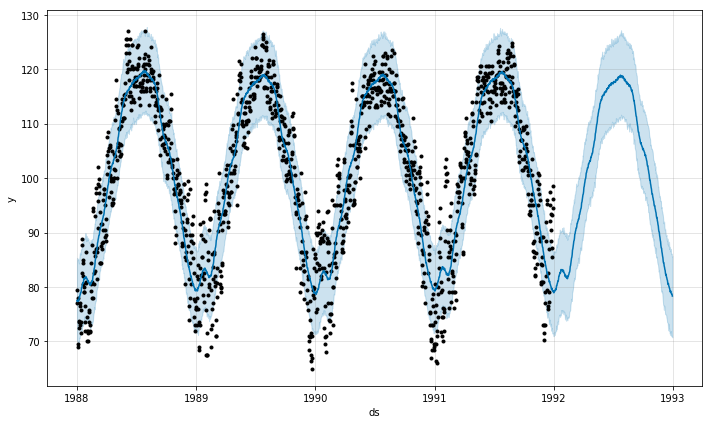

In [82]:
fig1 = m.plot(forecast)
plt.show()

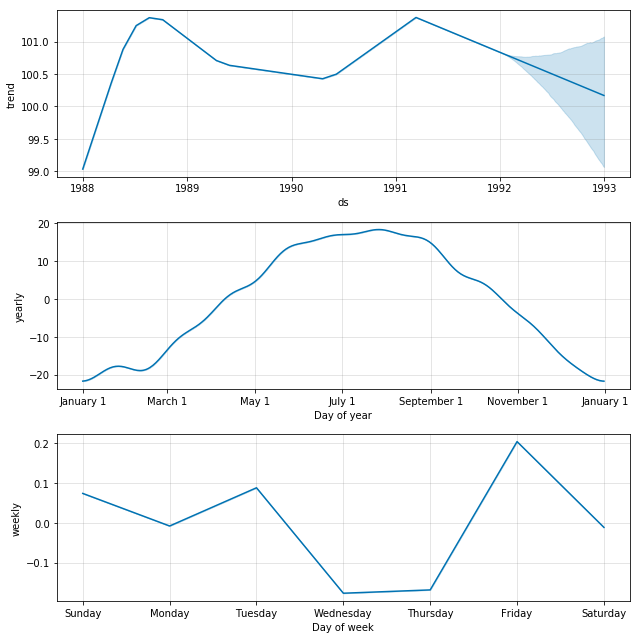

In [83]:
fig2 = m.plot_components(forecast)
plt.show()